In [5]:
# ייבוא ספריות והגדרות מסודרות לעבודה שלי של חן ורעות
# לא לגעת בזה 
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats  # למבחנים סטטיסטיים שונים (t-test, חי בריבוע, ANOVA ועוד)
import statsmodels.api as sm  # לרגרסיה לוגיסטית ומבחנים נוספים
import statsmodels.formula.api as smf  # לרגרסיה מבוססת נוסחאות





"""
 כללי עבודה:
1. כל פקודה תעובד בנפרד בשלב הראשון, כך נוכל לבדוק אם יש שגיאות בודדות ולטפל בהן.
2. בסוף, אחרי שכל הפקודות נבדקו והן פועלות בצורה תקינה, נריץ את כל הפקודות יחד.
# זה חשוב לוודא שהקוד עובד כמו שצריך ולמנוע בעיות לא צפויות בריצה הגדולה
"""

"""
מה הספקנו עד עכשיו:
1. הגדרת נתיב לשאיבת הנתונים של הקובץ המקורי
2. ניקוי כל השורות האחרונות והמיותרות
3. בדיקה של ערכים חסרים בכל עמודה
"""

"""
תכונות מעניינות שלמדנו:
1. במידה ושמים נקודה פסיק  בסוף פקודה היא לא תרוץ
2. קיצור להרצת הקוד - שיפט ואנטר ביחד
3. קיצור לצפייה בהוראות הפקודה - שיפט וטאב ביחד
"""

# קביעת הנתיב של תיקיית העבודה הנוכחית
project_root = os.getcwd()
input_file = os.path.join(project_root,"Update 1 - Gender","update 25.xlsx")

In [19]:
# זה לא מבחן סטטיסטי אלא לעמוד 7 במצגת 

# קריאה לקובץ האקסל
df = pd.read_excel(input_file)

# חישוב כמות המטופלים הייחודיים
unique_patients_count = df['מספר מטופל רנדומלי'].nunique()

# חישוב מספר האשפוזים הכולל
total_admissions = df.groupby('מספר מטופל רנדומלי')['מספר מקרה אשפוז רנדומלי'].nunique().sum()

# חישוב ממוצע האשפוזים למטופל
average_admissions_per_patient = total_admissions / unique_patients_count

# חישוב מדד הימים הממוצע של אשפוז לכל מטופל
df['תאריך ושעת יציאה מהמחלקה'] = pd.to_datetime(df['תאריך ושעת יציאה מהמחלקה'])
df['תאריך ושעת כניסה למחלקה'] = pd.to_datetime(df['תאריך ושעת כניסה למחלקה'])
df['days_in_hospital'] = (df['תאריך ושעת יציאה מהמחלקה'] - df['תאריך ושעת כניסה למחלקה']).dt.days
average_days_in_hospital = df.groupby('מספר מטופל רנדומלי')['days_in_hospital'].sum().mean()

unique_patients_count, total_admissions, average_admissions_per_patient, average_days_in_hospital


(4162, 8133, 1.9541086016338298, 124.6045170591062)

C:\Users\hadma\AppData\Local\Temp\ipykernel_10440\3998175771.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="נקבה", y="גיל אשפוז", data=df_unique, palette=["#1f77b4", "#ff69b4"], inner="quart")


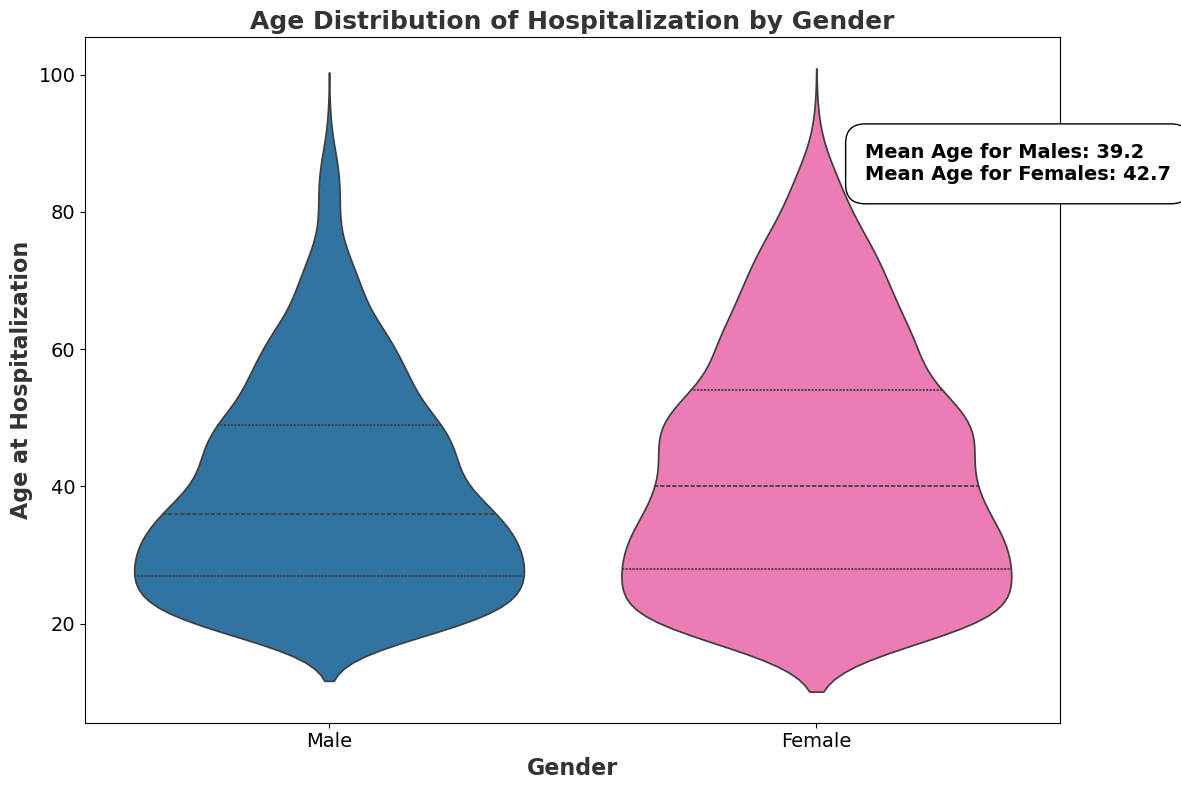

('C:\\Users\\hadma\\Desktop\\git\\DataFinalProjectDegree\\final_project\\Statistical tests_Updates\\Update 1 - Gender\\TTest_Gender_Age\\Mann_Whitney_Test_Results_Gender_Age.txt',
 'C:\\Users\\hadma\\Desktop\\git\\DataFinalProjectDegree\\final_project\\Statistical tests_Updates\\Update 1 - Gender\\TTest_Gender_Age\\mann_whitney_gender_age_violin_plot_with_mean_positioned.png')

In [16]:
# מבחן סטטסיטי לבדיקת הקשר בין המגדרים לגיל שלהם ומסקנות לגבי אשפוזים חוזרים
# קריאה לקובץ האקסל
df = pd.read_excel(input_file)

# הסרת כפילויות לפי "מספר מטופל רנדומלי" כדי להבטיח שכל מטופל ייספר פעם אחת בלבד
df_unique = df.drop_duplicates(subset='מספר מטופל רנדומלי')

# יצירת תיקייה לשמירת התוצאות
ttest_gender_age_dir = os.path.join(project_root, "Update 1 - Gender", "Mann_Whitney_Test_Gender_vs_Age")
os.makedirs(ttest_gender_age_dir, exist_ok=True)

# פילוח הנתונים לפי מגדר
males_age = df_unique[df_unique['נקבה'] == 0]['גיל אשפוז']
females_age = df_unique[df_unique['נקבה'] == 1]['גיל אשפוז']

# ביצוע מבחן Mann-Whitney U
u_stat, p_value_mann_whitney = stats.mannwhitneyu(males_age, females_age)

# חישוב הגיל הממוצע עבור גברים ונשים
mean_males_age = males_age.mean()
mean_females_age = females_age.mean()

# יצירת גרף Violin Plot מקצועי עם הגיל הממוצע
plt.figure(figsize=(12, 8))

# יצירת הגרף Violin Plot
sns.violinplot(x="נקבה", y="גיל אשפוז", data=df_unique, palette=["#1f77b4", "#ff69b4"], inner="quart")

# כותרת לגרף
plt.title("Age Distribution of Hospitalization by Gender", fontsize=18, fontweight="bold", color="#333333")
plt.xlabel("Gender", fontsize=16, fontweight="bold", color="#333333")
plt.ylabel("Age at Hospitalization", fontsize=16, fontweight="bold", color="#333333")

# הוספת תוויות צבעוניות
plt.xticks([0, 1], ['Male', 'Female'], fontsize=14)
plt.yticks(fontsize=14)

# הוספת הגיל הממוצע בצד ימין למעלה ליד הכותרת
plt.text(1.1, 90, f"Mean Age for Males: {mean_males_age:.1f}\nMean Age for Females: {mean_females_age:.1f}",
         ha='left', va='top', fontsize=14, color='black', fontweight='bold', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))

# שמירת הגרף
mann_whitney_graph_path_violin_with_mean = os.path.join(ttest_gender_age_dir, "mann_whitney_gender_age_violin_plot_with_mean_positioned.png")
plt.tight_layout()
plt.savefig(mann_whitney_graph_path_violin_with_mean, format='png')
plt.show()

# יצירת קובץ טקסט עם תוצאות המבחן Mann-Whitney U
mann_whitney_results = f"""
Mann-Whitney U Test Results for Gender vs Age:

U-Statistic: {u_stat:.2f}
P-Value: {p_value_mann_whitney:.3f}

Conclusion:
- If p-value < 0.05, there is a significant difference between male and female ages at the time of hospitalization.
- If p-value >= 0.05, there is no significant difference between the groups.

**Specific Findings:**
- The mean age for **Males** at the time of hospitalization: **{mean_males_age:.1f}**
- The mean age for **Females** at the time of hospitalization: **{mean_females_age:.1f}**
"""

# שמירת התוצאות בקובץ טקסט בתיקייה המתאימה
mann_whitney_results_path_text = os.path.join(ttest_gender_age_dir, "Mann_Whitney_Test_Results_Gender_Age.txt")
with open(mann_whitney_results_path_text, "w") as file:
    file.write(mann_whitney_results)

# הצגת נתיב הקובץ ששמרנו
mann_whitney_results_path_text, mann_whitney_graph_path_violin_with_mean
